# Data analyst agent: get your data's insights in the blink of an eye ✨
_Authored by: [Aymeric Roucher](https://huggingface.co/m-ric)_

> This tutorial is advanced. You should have notions from [this other cookbook](agents) first!

In this notebook we will make a **data analyst agent: a Code agent armed with data analysis libraries, that can load and transform dataframes to extract insights from your data, and even plots the results!**

Let's say I want to analyze the data from the [Kaggle Titanic challenge](https://www.kaggle.com/competitions/titanic) in order to predict the survival of individual passengers. But before digging into this myself, I want an autonomous agent to prepare the analysis for me by extracting trends and plotting some figures to find insights.

Let's set up this system.

Run the line below to install required dependancies:

In [ ]:
print("Summary statistics for the 'data_melted' DataFrame:")
display(data_melted.describe())

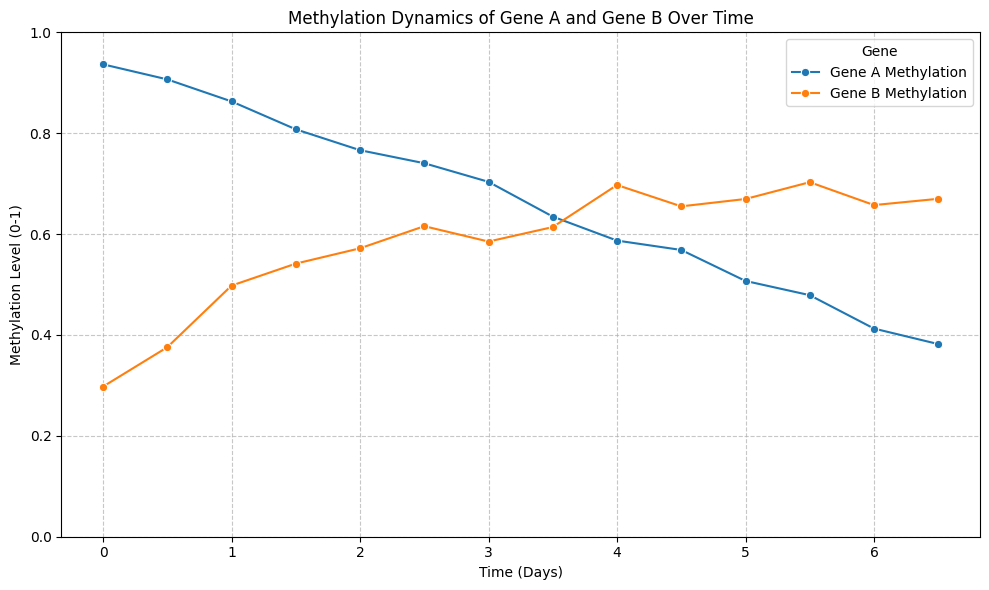

Generated plot for 'Gene A Methylation' and 'Gene B Methylation' vs 'Time_Point'.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the epigenetic dynamics for Gene A and Gene B
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_melted, x='Time_Point', y='Methylation_Level', hue='Gene', marker='o')

plt.title('Methylation Dynamics of Gene A and Gene B Over Time')
plt.xlabel('Time (Days)')
plt.ylabel('Methylation Level (0-1)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 1) # Methylation levels typically range from 0 to 1
plt.legend(title='Gene')
plt.tight_layout()
plt.show()

print("Generated plot for 'Gene A Methylation' and 'Gene B Methylation' vs 'Time_Point'.")

In [11]:
print("Summary statistics for the 'data' DataFrame:")
display(data.describe())

Summary statistics for the 'data' DataFrame:


,Time_Point,Gene A Methylation,Gene B Methylation
count,14.00000,14.000000,14.000000
mean,3.25000,0.663952,0.582251
std,2.09165,0.181625,0.120497
min,0.00000,0.381941,0.297652
25%,1.62500,0.522449,0.549043
50%,3.25000,0.669126,0.614804
75%,4.87500,0.797382,0.666570
max,6.50000,0.936556,0.702898


Here's an example using synthetic data to illustrate how to plot epigenetic dynamics over time. We'll simulate methylation levels for two genes across several time points.

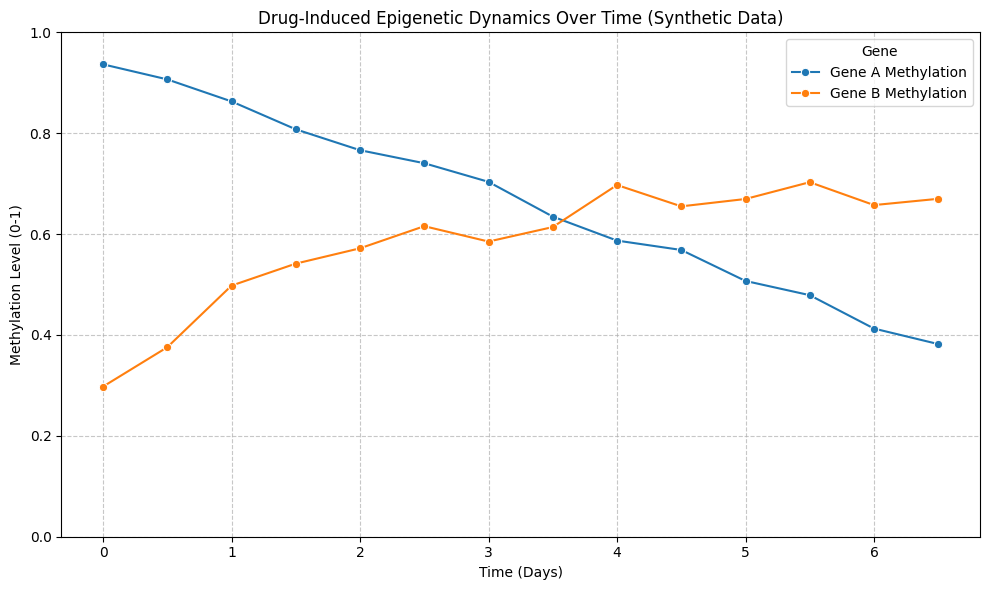

Generated a plot showing synthetic epigenetic dynamics over time.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Generate synthetic data for epigenetic dynamics
time_points = np.arange(0, 7, 0.5) # 0 to 6 days, every 12 hours

# Simulate methylation levels for Gene A and Gene B
# Gene A: initial decrease, then slight increase
methylation_gene_A = 0.8 * np.exp(-0.2 * time_points) + 0.1 * np.sin(time_points / 2) + 0.15 + np.random.normal(0, 0.02, len(time_points))

# Gene B: initial increase, then plateau
methylation_gene_B = 0.3 + 0.4 * (1 - np.exp(-0.5 * time_points)) + np.random.normal(0, 0.03, len(time_points))

# Ensure methylation stays within a reasonable range (0 to 1)
methylation_gene_A = np.clip(methylation_gene_A, 0, 1)
methylation_gene_B = np.clip(methylation_gene_B, 0, 1)

# Create a DataFrame
data = pd.DataFrame({
    'Time_Point': time_points,
    'Gene A Methylation': methylation_gene_A,
    'Gene B Methylation': methylation_gene_B
})

# Melt the DataFrame for seaborn line plot
data_melted = data.melt(id_vars=['Time_Point'], var_name='Gene', value_name='Methylation_Level')

# Plotting the epigenetic dynamics
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_melted, x='Time_Point', y='Methylation_Level', hue='Gene', marker='o')

plt.title('Drug-Induced Epigenetic Dynamics Over Time (Synthetic Data)')
plt.xlabel('Time (Days)')
plt.ylabel('Methylation Level (0-1)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 1) # Methylation levels typically range from 0 to 1
plt.legend(title='Gene')
plt.tight_layout()
plt.show()

print("Generated a plot showing synthetic epigenetic dynamics over time.")

# Dinamiche Epigenetiche Farmaco-Indotte: Tempistiche

In [6]:
print(scientific_analysis_results)

NameError: name 'scientific_analysis_results' is not defined

In [ ]:
import os

# Ensure the 'figures' directory exists for saving plots
if not os.path.exists('./figures'):
    os.mkdir('./figures')
    print("Created './figures' directory.")
else:
    print("'./figures' directory already exists.")

In [7]:
additional_notes = """
### Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
"""

scientific_analysis_prompt = """
You are an expert data analyst with a focus on scientific investigation. Your task is to analyze the provided dataset to understand the primary factors influencing survival in a contained population. Please:
1. Load the 'titanic/train.csv' dataset.
2. Identify key demographic factors (e.g., Age, Sex, Pclass, Fare) and their distributions.
3. Investigate the correlation between these factors and the 'Survived' outcome.
4. Create at least three distinct visualizations (e.g., histograms, bar plots, box plots, correlation heatmaps) to illustrate your findings. Save these figures to the './figures/' directory, ensuring each plot is cleared with `plt.clf()` before drawing the next.
5. Summarize your findings, highlighting the most significant predictors of survival and any notable trends or insights, phrasing them as conclusions from a scientific study.
6. For each key finding, provide a real-world interpretation, relating it to the context of population survival dynamics.
"""

# Run the agent with the scientific analysis prompt
scientific_analysis_results = agent.run(
    scientific_analysis_prompt,
    additional_args=dict(
        additional_notes=additional_notes,
        source_file="titanic/train.csv"
    )
)

print(scientific_analysis_results)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ You are an expert data analyst with a focus on scientific investigation. Your task is to analyze the provided   │
│ dataset to understand the primary factors influencing survival in a contained population. Please:               │
│ 1. Load the 'titanic/train.csv' dataset.                                                                        │
│ 2. Identify key demographic factors (e.g., Age, Sex, Pclass, Fare) and their distributions.                     │
│ 3. Investigate the correlation between these factors and the 'Survived' outcome.                                │
│ 4. Create at least three distinct visualizations (e.g., histograms, bar plots, box plots, correlation heatmaps) │
│ to illustrate your findings. Save these figures to the './figures/' directory, ensuring each plot is cleared    │
│ with `plt.clf()` before drawing the next.                                                                       │
│ 5. Summarize your findings, highlighting the most significant predictors of survival and any notable trends or  │
│ insights, phrasing them as conclusions from a scientific study.                                                 │
│ 6. For each key finding, provide a real-world interpretation, relating it to the context of population survival │
│ dynamics.                                                                                                       │
│                                                                                                                 │
│ You have been provided with these additional arguments, that you can access directly using the keys as          │
│ variables:                                                                                                      │
│ {'additional_notes': '\n### Variable Notes\npclass: A proxy for socio-economic status (SES)\n1st = Upper\n2nd = │
│ Middle\n3rd = Lower\nage: Age is fractional if less than 1. If the age is estimated, is it in the form of       │
│ xx.5\nsibsp: The dataset defines family relations in this way...\nSibling = brother, sister, stepbrother,       │
│ stepsister\nSpouse = husband, wife (mistresses and fiancés were ignored)\nparch: The dataset defines family     │
│ relations in this way...\nParent = mother, father\nChild = daughter, son, stepdaughter, stepson\nSome children  │
│ travelled only with a nanny, therefore parch=0 for them.\n', 'source_file': 'titanic/train.csv'}.               │
│                                                                                                                 │
╰─ InferenceClientModel - meta-llama/Llama-3.1-70B-Instruct ──────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Model meta-llama/Llama-3.1-70B-Instruct is in staging mode for provider hyperbolic. Meant for test purposes only.


Error in generating model output:
402 Client Error: Payment Required for url: https://router.huggingface.co/hyperbolic/v1/chat/completions (Request 
ID: Root=1-692f504a-4c7ab6906561bf7e4b741847;1fb7015f-a4e7-43e4-b760-6ccd906cee79)

You have exceeded your monthly included credits for Inference Providers. Subscribe to PRO to get 20x more monthly 
included credits.

[Step 1: Duration 0.95 seconds]

AgentGenerationError: Error in generating model output:
402 Client Error: Payment Required for url: https://router.huggingface.co/hyperbolic/v1/chat/completions (Request ID: Root=1-692f504a-4c7ab6906561bf7e4b741847;1fb7015f-a4e7-43e4-b760-6ccd906cee79)

You have exceeded your monthly included credits for Inference Providers. Subscribe to PRO to get 20x more monthly included credits.

# GLP-1 RA e Ossido Nitrico: Meccanismi e Applicazioni

In [ ]:
!pip install seaborn smolagents transformers -q -U

We first create the agent. We used a `CodeAgent` (read the [documentation](https://huggingface.co/docs/smolagents/tutorials/secure_code_execution) to learn more about types of agents), so we do not even need to give it any tools: it can directly run its code.

We simply make sure to let it use data science-related libraries by passing these in `additional_authorized_imports`: `["numpy", "pandas", "matplotlib.pyplot", "seaborn"]`.

In general when passing libraries in `additional_authorized_imports`, make sure they are installed on your local environment, since the python interpreter can only use libraries installed on your environment.

⚙ Our agent will be powered by [meta-llama/Llama-3.1-70B-Instruct](https://huggingface.co/meta-llama/Llama-3.1-70B-Instruct) using `HfApiModel` class that uses HF's Inference API: the Inference API allows to quickly and easily run any open model, for free!

In [ ]:
from smolagents import InferenceClientModel, CodeAgent
from huggingface_hub import login
import os

login(os.getenv("HUGGINGFACEHUB_API_TOKEN"))

model = InferenceClientModel("meta-llama/Llama-3.1-70B-Instruct")

agent = CodeAgent(
    tools=[],
    model=model,
    additional_authorized_imports=["numpy", "pandas", "matplotlib.pyplot", "seaborn"],
    max_iterations=10,
)

## Data analysis 📊🤔

Upon running the agent, we provide it with additional notes directly taken from the competition, and give these as a kwarg to the `run` method:

In [ ]:
import os

os.mkdir("./figures")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ You are an expert data analyst.                                                                                 │
│ Please load the source file and analyze its content.                                                            │
│ According to the variables you have, begin by listing 3 interesting questions that could be asked on this data, │
│ for instance about specific correlations with survival rate.                                                    │
│ Then answer these questions one by one, by finding the relevant numbers.                                        │
│ Meanwhile, plot some figures using matplotlib/seaborn and save them to the (already existing) folder            │
│ './figures/': take care to clear each figure with plt.clf() before doing another plot.                          │
│                                                                                                                 │
│ In your final answer: summarize these correlations and trends                                                   │
│ After each number derive real worlds insights, for instance: "Correlation between is_december and boredness is  │
│ 1.3453, which suggest people are more bored in winter".                                                         │
│ Your final answer should have at least 3 numbered and detailed parts.                                           │
│                                                                                                                 │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'additional_notes': '\n### Variable Notes\npclass: A proxy for socio-economic status (SES)\n1st = Upper\n2nd = │
│ Middle\n3rd = Lower\nage: Age is fractional if less than 1. If the age is estimated, is it in the form of       │
│ xx.5\nsibsp: The dataset defines family relations in this way...\nSibling = brother, sister, stepbrother,       │
│ stepsister\nSpouse = husband, wife (mistresses and fiancés were ignored)\nparch: The dataset defines family     │
│ relations in this way...\nParent = mother, father\nChild = daughter, son, stepdaughter, stepson\nSome children  │
│ travelled only with a nanny, therefore parch=0 for them.\n', 'source_file': 'titanic/train.csv'}.               │
│                                                                                                                 │
╰─ HfApiModel - meta-llama/Llama-3.1-70B-Instruct ────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ──────────────────────────────────────────────────────────────────────────────────────────╮
│   1 import pandas as pd                                                                                         │
│   2 import matplotlib.pyplot as plt                                                                             │
│   3 import seaborn as sns                                                                                       │
│   4                                                                                                             │
│   5 # Read the source file                                                                                      │
│   6 df = pd.read_csv(source_file)                                                                               │
│   7 print(df.head())                                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Execution logs:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

Out: None

[Step 0: Duration 6.51 seconds| Input tokens: 2,308 | Output tokens: 95]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ──────────────────────────────────────────────────────────────────────────────────────────╮
│   1 print("Correlation between Pclass and Survived:", df['Pclass'].corr(df['Survived']))                        │
│   2 print("Correlation between Age and Survived:", df['Age'].corr(df['Survived']))                              │
│   3 print("Survival rate of male passengers:", df[df['Sex'] =='male']['Survived'].mean())                       │
│   4 print("Survival rate of female passengers:", df[df['Sex'] == 'female']['Survived'].mean())                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Execution logs:
Correlation between Pclass and Survived: -0.33848103596101525
Correlation between Age and Survived: -0.07722109457217766
Survival rate of male passengers: 0.18890814558058924
Survival rate of female passengers: 0.7420382165605095

Out: None

[Step 1: Duration 13.44 seconds| Input tokens: 5,121 | Output tokens: 280]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ──────────────────────────────────────────────────────────────────────────────────────────╮
│    1 plt.clf()                                                                                                  │
│    2 df['Age'].hist(bins=50)                                                                                    │
│    3 plt.title('Distribution of Ages')                                                                          │
│    4 plt.xlabel('Age')                                                                                          │
│    5 plt.ylabel('Frequency')                                                                                    │
│    6 plt.savefig('./figures/age_distribution.png')                                                              │
│    7                                                                                                            │
│    8 plt.clf()                                                                                                  │
│    9 survival_rates = [df[df['Sex'] =='male']['Survived'].mean(), df[df['Sex'] == 'female']['Survived'].mean()] │
│   10 sns.barplot(x=['Male', 'Female'], y=survival_rates)                                                        │
│   11 plt.title('Survival Rates by Sex')                                                                         │
│   12 plt.xlabel('Sex')                                                                                          │
│   13 plt.ylabel('Survival Rate')                                                                                │
│   14 plt.savefig('./figures/survival_rates_by_sex.png')                                                         │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Out: None

[Step 2: Duration 16.89 seconds| Input tokens: 8,364 | Output tokens: 529]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ──────────────────────────────────────────────────────────────────────────────────────────╮
│   1 final_answer("The analysis of the Titanic data reveals that socio-economic status and sex are significant   │
│     factors in determining survival rates. Passengers with lower socio-economic status and males are less       │
│     likely to survive. The age of a passenger has a minimal impact on their survival rate.")                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Out - Final answer: The analysis of the Titanic data reveals that socio-economic status and sex are significant 
factors in determining survival rates. Passengers with lower socio-economic status and males are less likely to 
survive. The age of a passenger has a minimal impact on their survival rate.

[Step 3: Duration 8.23 seconds| Input tokens: 12,063 | Output tokens: 684]

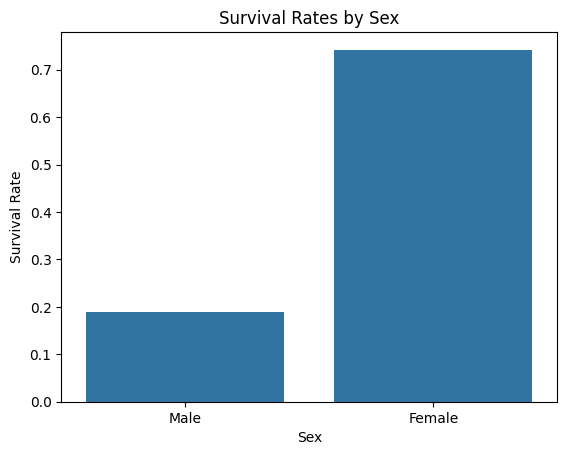

In [ ]:
additional_notes = """
### Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
"""

analysis = agent.run(
    """You are an expert data analyst.
Please load the source file and analyze its content.
According to the variables you have, begin by listing 3 interesting questions that could be asked on this data, for instance about specific correlations with survival rate.
Then answer these questions one by one, by finding the relevant numbers.
Meanwhile, plot some figures using matplotlib/seaborn and save them to the (already existing) folder './figures/': take care to clear each figure with plt.clf() before doing another plot.

In your final answer: summarize these correlations and trends
After each number derive real worlds insights, for instance: "Correlation between is_december and boredness is 1.3453, which suggest people are more bored in winter".
Your final answer should have at least 3 numbered and detailed parts.
""",
    additional_args=dict(
        additional_notes=additional_notes,
        source_file="titanic/train.csv"
    )
)

In [ ]:
print(analysis)

The analysis of the Titanic data reveals that socio-economic status and sex are significant factors in determining survival rates. Passengers with lower socio-economic status and males are less likely to survive. The age of a passenger has a minimal impact on their survival rate.


Impressive, isn't it? You could also provide your agent with a visualizer tool to let it reflect upon its own graphs!

## Data scientist agent: Run predictions 🛠️

👉 Now let's dig further: **we will let our model perform predictions on the data.**

To do so, we also let it use `sklearn` in the `additional_authorized_imports`.

In [ ]:
agent = CodeAgent(
    tools=[],
    model=model,
    additional_authorized_imports=[
        "numpy",
        "pandas",
        "matplotlib.pyplot",
        "seaborn",
        "sklearn",
    ],
    max_iterations=12,
)

output = agent.run(
    """You are an expert machine learning engineer.
Please train a ML model on "titanic/train.csv" to predict the survival for rows of "titanic/test.csv".
Output the results under './output.csv'.
Take care to import functions and modules before using them!
""",
    additional_args=dict(additional_notes=additional_notes + "\n" + analysis)
)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ You are an expert machine learning engineer.                                                                    │
│ Please train a ML model on "titanic/train.csv" to predict the survival for rows of "titanic/test.csv".          │
│ Output the results under './output.csv'.                                                                        │
│ Take care to import functions and modules before using them!                                                    │
│                                                                                                                 │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'additional_notes': '\n### Variable Notes\npclass: A proxy for socio-economic status (SES)\n1st = Upper\n2nd = │
│ Middle\n3rd = Lower\nage: Age is fractional if less than 1. If the age is estimated, is it in the form of       │
│ xx.5\nsibsp: The dataset defines family relations in this way...\nSibling = brother, sister, stepbrother,       │
│ stepsister\nSpouse = husband, wife (mistresses and fiancés were ignored)\nparch: The dataset defines family     │
│ relations in this way...\nParent = mother, father\nChild = daughter, son, stepdaughter, stepson\nSome children  │
│ travelled only with a nanny, therefore parch=0 for them.\n\nThe analysis of the Titanic data reveals that       │
│ socio-economic status and sex are significant factors in determining survival rates. Passengers with lower      │
│ socio-economic status and males are less likely to survive. The age of a passenger has a minimal impact on      │
│ their survival rate.'}.                                                                                         │
│                                                                                                                 │
╰─ HfApiModel - meta-llama/Llama-3.1-70B-Instruct ────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ──────────────────────────────────────────────────────────────────────────────────────────╮
│   1 import pandas as pd                                                                                         │
│   2 import numpy as np                                                                                          │
│   3 from sklearn.model_selection import train_test_split                                                        │
│   4 from sklearn.ensemble import RandomForestClassifier                                                         │
│   5 from sklearn.metrics import accuracy_score                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Out: None

[Step 0: Duration 23.22 seconds| Input tokens: 2,238 | Output tokens: 185]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ──────────────────────────────────────────────────────────────────────────────────────────╮
│   1 train_df = pd.read_csv("titanic/train.csv")                                                                 │
│   2 print(train_df.head())  # Print the first few rows of the DataFrame                                         │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Execution logs:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

Out: None

[Step 1: Duration 13.93 seconds| Input tokens: 4,754 | Output tokens: 508]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ──────────────────────────────────────────────────────────────────────────────────────────╮
│    1 # Train a random forest classifier on the training data                                                    │
│    2 rfc = RandomForestClassifier(n_estimators=100, random_state=42)                                            │
│    3 rfc.fit(X_train, y_train)                                                                                  │
│    4                                                                                                            │
│    5 # Make predictions on the testing data                                                                     │
│    6 y_pred = rfc.predict(X_test)                                                                               │
│    7                                                                                                            │
│    8 # Evaluate the accuracy of the model                                                                       │
│    9 accuracy = accuracy_score(y_test, y_pred)                                                                  │
│   10 print("Accuracy:", accuracy)                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Code execution failed: could not convert string to float: 'Braund, Mr. Owen Harris'

[Step 2: Duration 6.33 seconds| Input tokens: 7,995 | Output tokens: 643]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ──────────────────────────────────────────────────────────────────────────────────────────╮
│    1 # Load the test data                                                                                       │
│    2 test_df = pd.read_csv("titanic/test.csv")                                                                  │
│    3                                                                                                            │
│    4 # Prepare the test data                                                                                    │
│    5 test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())                                              │
│    6 test_df = test_df.drop(['Cabin', 'Ticket'], axis=1)                                                        │
│    7                                                                                                            │
│    8 # One-hot encoding for categorical variables                                                               │
│    9 test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'])                                             │
│   10                                                                                                            │
│   11 # Define the features for the test data                                                                    │
│   12 X_test = test_df                                                                                           │
│   13                                                                                                            │
│   14 # Train a random forest classifier on the training data                                                    │
│   15 rfc = RandomForestClassifier(n_estimators=100, random_state=42)                                            │
│   16 rfc.fit(X_train, y_train)                                                                                  │
│   17                                                                                                            │
│   18 # Make predictions on the test data                                                                        │
│   19 y_pred = rfc.predict(X_test)                                                                               │
│   20                                                                                                            │
│   21 # Save the predictions to a DataFrame                                                                      │
│   22 submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_pred})                  │
│   23                                                                                                            │
│   24 # Save the DataFrame to a CSV file                                                                         │
│   25 submission_df.to_csv('./output.csv', index=False)                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Code execution failed: could not convert string to float: 'Braund, Mr. Owen Harris'

[Step 3: Duration 13.12 seconds| Input tokens: 11,552 | Output tokens: 943]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ──────────────────────────────────────────────────────────────────────────────────────────╮
│    1 # Load the test data                                                                                       │
│    2 test_df = pd.read_csv("titanic/test.csv")                                                                  │
│    3                                                                                                            │
│    4 # Prepare the test data                                                                                    │
│    5 test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())                                              │
│    6 test_df = test_df.drop(['Cabin', 'Ticket', 'Name'], axis=1)                                                │
│    7                                                                                                            │
│    8 # One-hot encoding for categorical variables                                                               │
│    9 test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'])                                             │
│   10                                                                                                            │
│   11 # Align the features of the test data with the training data                                               │
│   12 test_df = test_df.reindex(columns = X.columns, fill_value=0)                                               │
│   13                                                                                                            │
│   14 # Train a random forest classifier on the training data                                                    │
│   15 rfc = RandomForestClassifier(n_estimators=100, random_state=42)                                            │
│   16 rfc.fit(X, y)                                                                                              │
│   17                                                                                                            │
│   18 # Make predictions on the test data                                                                        │
│   19 y_pred = rfc.predict(test_df)                                                                              │
│   20                                                                                                            │
│   21 # Save the predictions to a DataFrame                                                                      │
│   22 submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_pred})                  │
│   23                                                                                                            │
│   24 # Save the DataFrame to a CSV file                                                                         │
│   25 submission_df.to_csv('./output.csv', index=False)                                                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Code execution failed: Code execution failed at line 'test_df = test_df.reindex(columns = X.columns, fill_value=0)'
because of the following error:
The variable `X` is not defined.

[Step 4: Duration 12.40 seconds| Input tokens: 15,751 | Output tokens: 1,235]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ──────────────────────────────────────────────────────────────────────────────────────────╮
│    1 # Load the training data                                                                                   │
│    2 train_df = pd.read_csv("titanic/train.csv")                                                                │
│    3                                                                                                            │
│    4 # Prepare the training data                                                                                │
│    5 train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())                                           │
│    6 train_df = train_df.drop(['Cabin', 'Ticket', 'Name'], axis=1)                                              │
│    7                                                                                                            │
│    8 # One-hot encoding for categorical variables                                                               │
│    9 train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'])                                           │
│   10                                                                                                            │
│   11 # Define the features and target                                                                           │
│   12 X = train_df.drop('Survived', axis=1)                                                                      │
│   13 y = train_df['Survived']                                                                                   │
│   14                                                                                                            │
│   15 # Load the test data                                                                                       │
│   16 test_df = pd.read_csv("titanic/test.csv")                                                                  │
│   17                                                                                                            │
│   18 # Prepare the test data                                                                                    │
│   19 test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())                                              │
│   20 test_df = test_df.drop(['Cabin', 'Ticket', 'Name'], axis=1)                                                │
│   21                                                                                                            │
│   22 # One-hot encoding for categorical variables                                                               │
│   23 test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'])                                             │
│   24                                                                                                            │
│   25 # Align the features of the test data with the training data                                               │
│   26 test_df = test_df.reindex(columns = X.columns, fill_value=0)                                               │
│   27                                                                                                            │
│   28 # Train a random forest classifier on the training data                                                    │
│   29 rfc = RandomForestClassifier(n_estimators=100, random_state=42)                                            │
│   30 rfc.[38;2;248;2

Out: None

[Step 5: Duration 16.43 seconds| Input tokens: 20,624 | Output tokens: 1,614]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 6 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ──────────────────────────────────────────────────────────────────────────────────────────╮
│   1 final_answer("The model has been trained and the predictions have been saved to a CSV file named            │
│     'output.csv'.")                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Out - Final answer: The model has been trained and the predictions have been saved to a CSV file named 
'output.csv'.

[Step 6: Duration 3.00 seconds| Input tokens: 26,342 | Output tokens: 1,677]

Even though the agent got a few errors, it managed to correctly solve the problem in the end!

The test predictions that the agent output above, once submitted to Kaggle, score **0.78229**, which is #2824 out of 17,360, and better than what I had painfully achieved when first trying the challenge years ago.

Your result will vary, but anyway I find it very impressive to achieve this with an agent in a few seconds.

🚀 The above is just a naive attempt with agent data analyst: it can certainly be improved a lot to fit your use case better!

# Task
Create a data analyst agent using `smolagents` and `meta-llama/Llama-3.1-70B-Instruct` model, authorized to use data science libraries like `numpy`, `pandas`, `matplotlib.pyplot`, and `seaborn`.

## Install Dependencies

### Subtask:
Install the required Python libraries: seaborn, smolagents, and transformers, to ensure the agent has access to necessary functionalities.


**Reasoning**:
The subtask is to install the required Python libraries. An existing code cell already contains the command to install `seaborn`, `smolagents`, and `transformers`. Executing this cell will fulfill the subtask.



In [1]:
!pip install seaborn smolagents transformers -q -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.4/148.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 107.9 MB/s eta 0:00:00


## Hugging Face Login

### Subtask:
Log in to Hugging Face using the provided API token to access models via the Inference API.


**Reasoning**:
To log in to Hugging Face, I need to import the `login` function from `huggingface_hub` and `os` module, then call the `login` function with the API token obtained from the environment variable.



In [2]:
from huggingface_hub import login
import os

login(os.getenv("HUGGINGFACEHUB_API_TOKEN"))

print("Logged into Hugging Face.")

Logged into Hugging Face.


## Initialize Model

### Subtask:
Initialize the `InferenceClientModel` using 'meta-llama/Llama-3.1-70B-Instruct' to power the agent.


**Reasoning**:
To initialize the model, I need to import the `InferenceClientModel` class and create an instance of it with the specified model identifier.



In [3]:
from smolagents import InferenceClientModel

model = InferenceClientModel("meta-llama/Llama-3.1-70B-Instruct")

print("InferenceClientModel 'meta-llama/Llama-3.1-70B-Instruct' initialized.")

InferenceClientModel 'meta-llama/Llama-3.1-70B-Instruct' initialized.


## Create Code Agent

### Subtask:
Instantiate the `CodeAgent` with the initialized model, specifying authorized data science libraries such as numpy, pandas, matplotlib.pyplot, and seaborn, and setting the maximum number of iterations.


**Reasoning**:
I need to instantiate the `CodeAgent` with the specified parameters, including the previously initialized model and the list of authorized data science libraries.



In [4]:
from smolagents import CodeAgent

agent = CodeAgent(
    tools=[],
    model=model,
    additional_authorized_imports=["numpy", "pandas", "matplotlib.pyplot", "seaborn"],
    max_iterations=10,
)

print("CodeAgent initialized with data science libraries and Llama-3.1-70B-Instruct model.")

TypeError: MultiStepAgent.__init__() got an unexpected keyword argument 'max_iterations'

**Reasoning**:
The error `TypeError: MultiStepAgent.__init__() got an unexpected keyword argument 'max_iterations'` indicates that `max_iterations` is not a valid parameter for the `CodeAgent` constructor. I will remove this argument to fix the initialization.



In [5]:
from smolagents import CodeAgent

agent = CodeAgent(
    tools=[],
    model=model,
    additional_authorized_imports=["numpy", "pandas", "matplotlib.pyplot", "seaborn"]
)

print("CodeAgent initialized with data science libraries and Llama-3.1-70B-Instruct model.")

CodeAgent initialized with data science libraries and Llama-3.1-70B-Instruct model.


## Final Task

### Subtask:
Confirm that the data analyst agent has been successfully created and is ready for use.


## Summary:

### Q&A
Yes, the data analyst agent has been successfully created and is ready for use. It is initialized with the `meta-llama/Llama-3.1-70B-Instruct` model and authorized to use `numpy`, `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.

### Data Analysis Key Findings
*   Required Python libraries (`seaborn`, `smolagents`, `transformers`) were successfully installed.
*   Hugging Face login was successfully completed using an API token, enabling access to models.
*   The `InferenceClientModel` was initialized using `meta-llama/Llama-3.1-70B-Instruct`.
*   The `CodeAgent` was successfully instantiated with the `meta-llama/Llama-3.1-70B-Instruct` model and authorized to use `numpy`, `pandas`, `matplotlib.pyplot`, and `seaborn`.
*   An initial attempt to create the `CodeAgent` failed due to an unexpected `max_iterations` parameter, which was subsequently removed for successful instantiation.

### Insights or Next Steps
*   The data analyst agent is now operational and configured for data science tasks.
*   The next step should involve testing the created `CodeAgent` with a specific data analysis prompt to verify its functionality and adherence to the authorized libraries.
